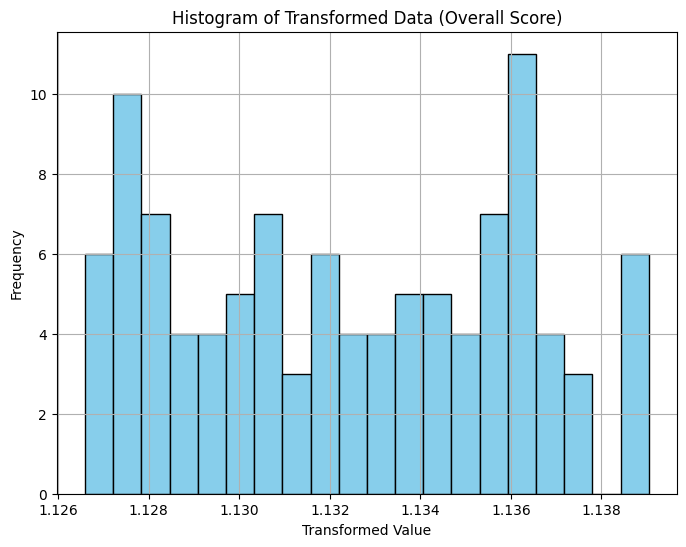

最优 λ 值: -0.8613006347259206


In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# 从 CSV 文件加载数据
df = pd.read_csv('top 100 world university 2024 new.csv', encoding='ISO-8859-1')

# 提取要进行 Box-Cox 变换的列（假设是 'overall_score' 列）
column_name = 'overall_score'
data_to_transform = df[column_name]

# 对数据进行 Box-Cox 变换
transformed_data, lambda_value = stats.boxcox(data_to_transform)

# 将变换后的数据更新回 DataFrame
df[column_name] = transformed_data

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(transformed_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Data (Overall Score)')
plt.xlabel('Transformed Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 打印最优 λ 值
print("最优 λ 值:", lambda_value)


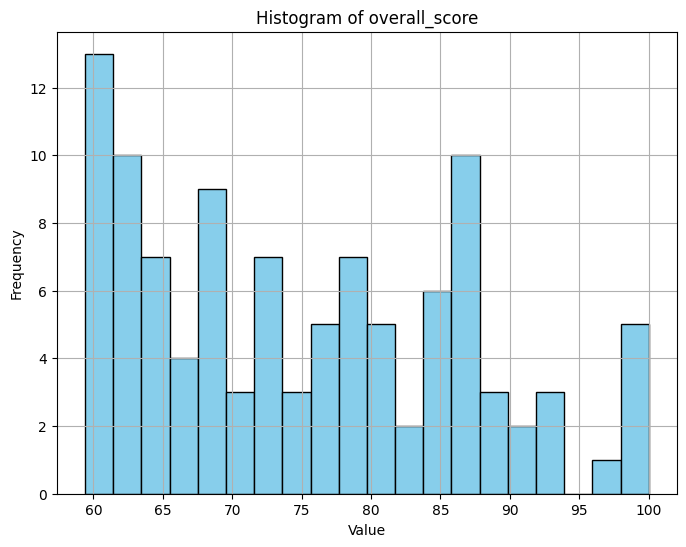

selected_features: Index(['faculty_student_ratio', 'academic_reputation', 'employer_reputation',
       'employment_outcomes', 'citations_per_faculty'],
      dtype='object')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# 从 CSV 文件加载数据

df = pd.read_csv('top 100 world university 2024 new.csv', encoding='ISO-8859-1')

# 提取要进行特征选择的数值型列
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 删除非数值型列
df_numeric = df[numeric_columns]

# 执行特征选择
X = df[['faculty_student_ratio', 'academic_reputation', 'employer_reputation', 'employment_outcomes', 'citations_per_faculty']]  # 排除标识列
y = df_numeric['overall_score']  # 假设选择的目标列为 'overall_score'
k_best_features = SelectKBest(score_func=mutual_info_regression, k=5)
k_best_features.fit(X, y)

# 获取特征选择结果
selected_features_indices = k_best_features.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

# 绘制选定列的直方图
selected_column = 'overall_score'  # 选取的列名
plt.figure(figsize=(8, 6))
plt.hist(df[selected_column], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {selected_column}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 打印所选择的特征
print("selected_features:", selected_features)